<a href="https://colab.research.google.com/github/JulioCastillo1/TP1-Datos/blob/master/veracidad%20segun%20signos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%pylab inline

url='https://raw.githubusercontent.com/JulioCastillo1/TP1-Datos/master/train.csv'
tweets = pd.read_csv(url)

Populating the interactive namespace from numpy and matplotlib


In [78]:
tweets['tiene_signo_interr_o_admir'] = tweets['text'].str.contains('\?')
tweets['tiene_signo_interr_o_admir'] = (tweets['tiene_signo_interr_o_admir']) | (tweets['text'].str.contains('\!'))

a = tweets[tweets['tiene_signo_interr_o_admir'] == True]
a.head()

,id,keyword,location,text,target,tiene_signo_interr_o_admir
15,23,NaN,NaN,What's up man?,0,True
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,True
23,34,NaN,NaN,What a wonderful day!,0,True
26,38,NaN,NaN,Was in NYC last week!,0,True
29,41,NaN,NaN,Do you like pasta?,0,True


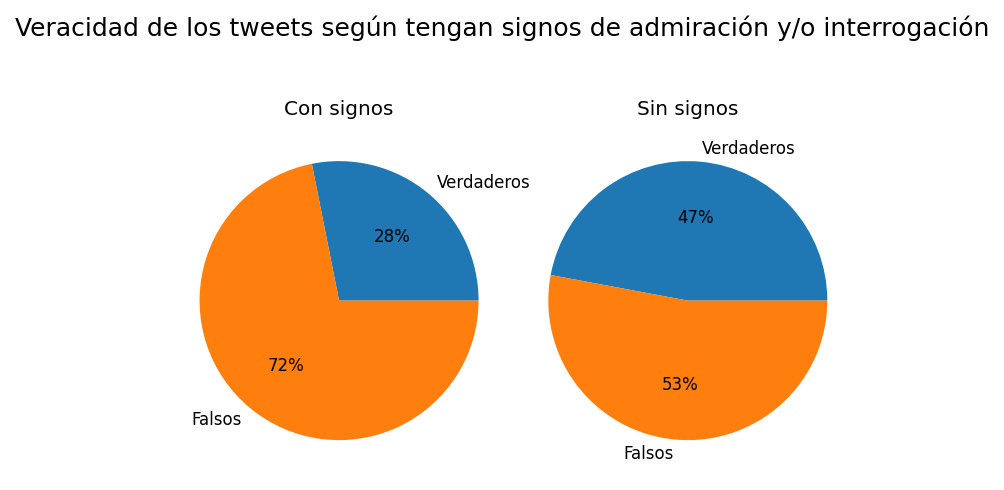

In [79]:
cantidad_de_tweets_con_signos_y_verdaderos = tweets[(tweets['tiene_signo_interr_o_admir'] == True) & (tweets['target'] == 1)].shape[0]
cantidad_de_tweets_con_signos_y_falsos = tweets[(tweets['tiene_signo_interr_o_admir'] == True) & (tweets['target'] == 0)].shape[0]
cantidad_de_tweets_sin_signos_y_verdaderos = tweets[(tweets['tiene_signo_interr_o_admir'] == False) & (tweets['target'] == 1)].shape[0]
cantidad_de_tweets_sin_signos_y_falsos = tweets[(tweets['tiene_signo_interr_o_admir'] == False) & (tweets['target'] == 0)].shape[0]

plt.rcParams['figure.dpi'] = 150

info1 = pd.Series([cantidad_de_tweets_con_signos_y_verdaderos, cantidad_de_tweets_con_signos_y_falsos],\
                  index = ['Verdaderos','Falsos'], name = '')
info2 = pd.Series([cantidad_de_tweets_sin_signos_y_verdaderos, cantidad_de_tweets_sin_signos_y_falsos],\
                  index = ['Verdaderos','Falsos'], name = '')
                  
mpl.rcParams['font.size'] = 10.0

fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle('Veracidad de los tweets según tengan signos de admiración y/o interrogación')

mpl.rcParams['font.size'] = 8.0

ax1.set_title('Con signos')
ax2.set_title('Sin signos')

plt.subplots_adjust(wspace = 0)

info1.plot(kind='pie', ax = ax1, autopct='%1.0f%%')
info2.plot(kind='pie', ax = ax2, autopct='%1.0f%%')


In [80]:
tweets['cantidad de signos'] = tweets['text'].apply(lambda x: x.count('?')+x.count('!'))
tweets.head()

,id,keyword,location,text,target,tiene_signo_interr_o_admir,cantidad de signos
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,False,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,False,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,False,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False,0


In [81]:
a = tweets.loc[tweets['tiene_signo_interr_o_admir'] != False]
a['counter'] = 1
a.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,keyword,location,text,target,tiene_signo_interr_o_admir,cantidad de signos,counter
15,23,NaN,NaN,What's up man?,0,True,1,1
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,True,6,1
23,34,NaN,NaN,What a wonderful day!,0,True,1,1
26,38,NaN,NaN,Was in NYC last week!,0,True,1,1
29,41,NaN,NaN,Do you like pasta?,0,True,1,1


In [82]:
 b = a.loc[a['target'] == 1].groupby('cantidad de signos').agg('count')['counter']
 c = a.loc[a['target'] == 0].groupby('cantidad de signos').agg('count')['counter']
 a = a.groupby('cantidad de signos').agg('count')['counter']
 a

cantidad de signos
1     804
2     415
3      94
4     121
5      25
6      74
7      16
8      35
9       6
10     15
11      7
12     15
13      1
14      2
15      1
16      1
18      3
20      1
21      1
22      2
24      1
26      1
28      1
34      1
50      2
54      1
Name: counter, dtype: int64

(1.0, 14.0, 0.0, 800.0)

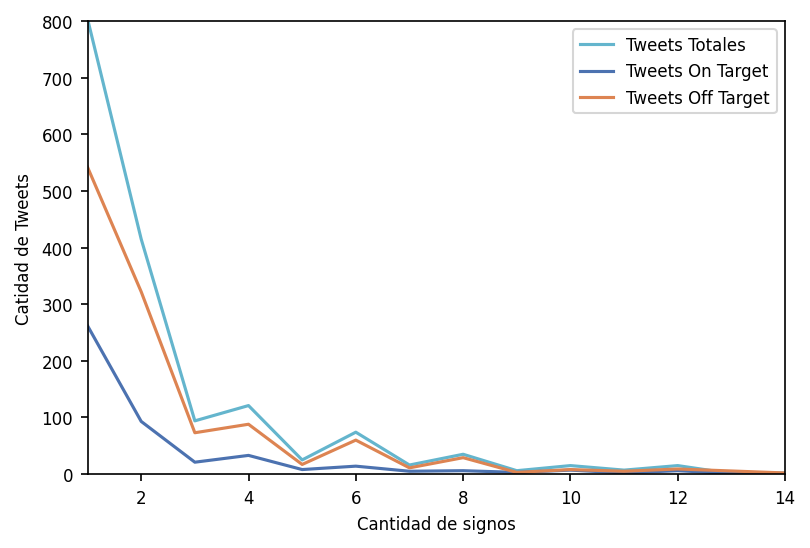

In [98]:
fi, ax =plt.subplots()
a.plot.line(color = ListedColormap(sns.color_palette('deep'))(9), legend = True)
b.plot.line(color = ListedColormap(sns.color_palette('deep'))(0), legend = True)
c.plot.line(color = ListedColormap(sns.color_palette('deep'))(1), legend = True)
ax.legend(('Tweets Totales','Tweets On Target', 'Tweets Off Target'))
ax.set_ylabel('Catidad de Tweets')
ax.set_xlabel('Cantidad de signos')
plt.axis([1,14,0,800])